In [1]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
# from keras.utils import np_utils
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [2]:
train_dir = './input/fruits-360/Training'
test_dir = './input/fruits-360/Test'

np.random.seed(1234)
directory=train_dir
classes=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [3]:
directory2=test_dir
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

In [4]:
dico = []

for i in range(len(all_arrays)):
    feature, label = all_arrays[i]
    img = feature
    sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.1)
    kp, des = sift.detectAndCompute(img, None)

    for d in des:
        dico.append(d)

In [5]:
from sklearn.cluster import MiniBatchKMeans
k = np.size(classes) * 10
batch_size = np.size(all_arrays) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(dico)

C:\Users\Ivan\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Init 1/3 with method: k-means++
Inertia for init 1/3: 1696627189.907670
Init 2/3 with method: k-means++
Inertia for init 2/3: 1689129175.621869
Init 3/3 with method: k-means++
Inertia for init 3/3: 1701214988.146392
Minibatch iteration 1/400: mean batch inertia: 22064.938542, ewa inertia: 22064.938542 
Minibatch iteration 2/400: mean batch inertia: 21440.889404, ewa inertia: 21701.866649 
Minibatch iteration 3/400: mean batch inertia: 21520.473700, ewa inertia: 21596.332201 
Minibatch iteration 4/400: mean batch inertia: 21193.966503, ewa inertia: 21362.235771 
Minibatch iteration 5/400: mean batch inertia: 21454.060153, ewa inertia: 21415.659212 
Minibatch iteration 6/400: mean batch inertia: 21575.749127, ewa inertia: 21508.799551 
Minibatch iteration 7/400: mean batch inertia: 21020.055587, ewa inertia: 21224.448232 
Minibatch iteration 8/400: mean batch inertia: 21076.750040, ewa inertia: 21138.517399 
Minibatch iteration 9/400: mean batch inertia: 21231.983525, ewa inertia: 21192.

In [6]:
kmeans.verbose = False

histo_list = []

for i in range(len(all_arrays)):
    feature, label = all_arrays[i]
    img = feature
    kp, des = sift.detectAndCompute(img, None)

    histo = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

In [7]:
from sklearn.neural_network import MLPClassifier
X = np.array(histo_list)
Y = []

# It's a way to convert species name into an integer
for feature,s in all_arrays:
    Y.append(s)

mlp = MLPClassifier(verbose=True, max_iter=600000)
mlp.fit(X, Y)

Iteration 1, loss = 2.17999043
Iteration 2, loss = 2.13360066
Iteration 3, loss = 2.07747716
Iteration 4, loss = 2.00568162
Iteration 5, loss = 1.91552180
Iteration 6, loss = 1.80638801
Iteration 7, loss = 1.68784319
Iteration 8, loss = 1.56467680
Iteration 9, loss = 1.44513991
Iteration 10, loss = 1.33212295
Iteration 11, loss = 1.22888927
Iteration 12, loss = 1.13604846
Iteration 13, loss = 1.05281257
Iteration 14, loss = 0.97964705
Iteration 15, loss = 0.91491909
Iteration 16, loss = 0.85658709
Iteration 17, loss = 0.80550470
Iteration 18, loss = 0.76000393
Iteration 19, loss = 0.71959893
Iteration 20, loss = 0.68345941
Iteration 21, loss = 0.65138962
Iteration 22, loss = 0.62224569
Iteration 23, loss = 0.59581759
Iteration 24, loss = 0.57206973
Iteration 25, loss = 0.54997762
Iteration 26, loss = 0.52968319
Iteration 27, loss = 0.51181129
Iteration 28, loss = 0.49504588
Iteration 29, loss = 0.47952947
Iteration 30, loss = 0.46519623
Iteration 31, loss = 0.45212440
Iteration 32, los

MLPClassifier(max_iter=600000, verbose=True)

In [8]:
import csv
result_file = open("sift.csv", "w")
result_file_obj = csv.writer(result_file)
result_file_obj.writerow(np.append("img", 'class'))

for i in range(len(all_arrays2)):
    feature, label = all_arrays2[i]
    img = feature
    kp, des = sift.detectAndCompute(img, None)

    x = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp

    res = mlp.predict([x])
    row = []
    row.append(i)

#     for e in res[0]:
#         row.append(e)

    row.append(res[0])

    result_file_obj.writerow(row)

result_file.close()

## SVM

In [9]:
from sklearn.svm import SVC
X = np.array(histo_list)
Y = []

for feature,s in all_arrays:
    Y.append(s)

svm = SVC()
svm.fit(X, Y)

SVC()

In [10]:
import csv
result_file = open("sift_svm.csv", "w")
result_file_obj = csv.writer(result_file)
result_file_obj.writerow(np.append("img", 'class'))

for i in range(len(all_arrays2)):
    feature, label = all_arrays2[i]
    img = feature
    kp, des = sift.detectAndCompute(img, None)

    x = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        x[idx] += 1/nkp

    res = svm.predict([x])
    row = []
    row.append(i)

#     for e in res[0]:
#         row.append(e)

    row.append(res[0])

    result_file_obj.writerow(row)

result_file.close()

In [11]:
svm_res = pd.read_csv('./sift_svm.csv')
svm_res

,img,class
0,0,0
1,1,6
2,2,0
3,3,0
4,4,0
...,...,...
1440,1440,8
1441,1441,8
1442,1442,8
1443,1443,8


In [12]:
y_test = []
for feature, label in all_arrays2:
    y_test.append(label)

In [13]:
y_pred = svm_res['class'].tolist()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))

0.8429065743944637


In [15]:
print(classification_report(y_test, y_pred, target_names=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]))

                precision    recall  f1-score   support

Apple Golden 1       0.95      0.76      0.84       160
       Avocado       0.77      0.80      0.78       143
        Banana       0.87      0.98      0.92       166
      Cherry 1       0.99      1.00      1.00       164
         Cocos       0.85      0.86      0.85       166
          Kiwi       0.72      0.74      0.73       156
         Lemon       0.78      0.79      0.79       164
         Mango       0.90      0.72      0.80       166
        Orange       0.79      0.93      0.86       160

      accuracy                           0.84      1445
     macro avg       0.85      0.84      0.84      1445
  weighted avg       0.85      0.84      0.84      1445



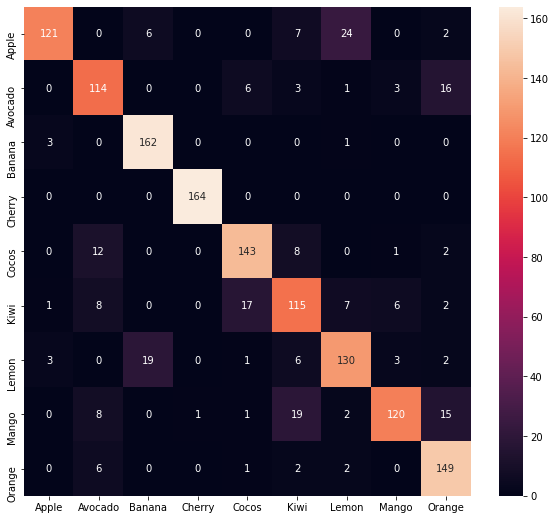

Accuracy with SIFT + SVM: 84.29%


In [16]:
#confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
#compute conf mat
conf_mat=confusion_matrix(y_test,y_pred)
#plot the con mat
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
precision = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy with SIFT + SVM: {0:.2f}%".format(precision))